Resolvendo um problema de classificação: Tarefa 3 da disciplina Reconhecimento de Padrões. 

Professor: Francisco de Assis Boldt 

Aluno: Diogo de Santana Candido

In [11]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.10


Item 1: Carregue uma base de dados de classificação (binária ou multiclasse, mas não multirrótulo) que NÃO esteja nos toy datasets do scikit-learn;

Foi escolhido o Datasets "Caesarian Section Classification Dataset" da UCI Marchine Learning Repository que disponibiliza dados coletados de grávidas com diferentes estados de saúde. Os seus metadados podem ser obtidos em https://archive.ics.uci.edu/ml/datasets/Caesarian+Section+Classification+Dataset#

Este trabalho tem por objetivo realizar a classificação binária se uma grávida fez cesária ou não fez cesária utilizando os dados da paciente: idade, número de partos, momento do parto, pressão sanguínia e problema cardíaco.  

Atributos:
@attribute 'Age' { 22,26,28,27,32,36,33,23,20,29,25,37,24,18,30,40,31,19,21,35,17,38 }
@attribute 'Delivery number' { 1,2,3,4 }
@attribute 'Delivery time' { 0,1,2 } -> {0 = timely , 1 = premature , 2 = latecomer}
@attribute 'Blood of Pressure' { 2,1,0 } -> {0 = low , 1 = normal , 2 = high }
@attribute 'Heart Problem' { 1,0 } -> {0 = apt, 1 = inept }

Rótulo:
@attribute Caesarian { 0,1 } -> {0 = No, 1 = Yes }

In [12]:
import pandas as pd
import urllib.request
from scipy.io.arff import loadarff
from io import StringIO

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00472/caesarian.csv.arff'
resp = urllib.request.urlopen(url)
data, meta = loadarff(StringIO(resp.read().decode('utf-8')))

df = pd.DataFrame(data)

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].str.decode('UTF-8')

X, y = df.iloc[:, :5], df.iloc[:, -1]

Item 2: Treine um modelo da classe LogisticRegression do scikit-learn com toda a base;

In [13]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(X, y)
ypred =  modelo.predict(X)
intercept_ypred = modelo.intercept_
coef_ypred = modelo.coef_
print("Valor do Intercept: ", intercept_ypred)
print("Valor dos coeficientes da Regressão Linear: ", coef_ypred)


Valor do Intercept:  [0.21811112]
Valor dos coeficientes da Regressão Linear:  [[-0.01158357  0.26613514 -0.41626695 -0.20000722  1.27783184]]


Item 3: Calcule o MSE (erro quadrático médio) para todos os exemplos da usada como treino no modelo treinado;

In [14]:
from sklearn.metrics import mean_squared_error

mse_ypred = mean_squared_error(y, ypred)
print("Valor MSE: ", mse_ypred)

Valor MSE:  0.25


Item 4: Plote 3 gráficos (2D) o MSE em função do atributo intercept_ da classe LogisticRegression. Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta.

1. Diferentemente da tarefa de regressão, o gráfico do erro da classificação, muito provavelmente, não terá a aparência "bem comportada" que o gráfico do erro da regressão teve. Por isso, você precisará encontrar 3 deltas (um para cada gráfico). Cada delta provavelmente apresentará uma impressão diferente do comportamento da função de erro.

2. O atributo intercept_ da classe LogisticRegression é um array que guarda o valor de interceptação de cada classe do problema da base de dados. Portanto, será necessário fazer 3 gráficos para cada valor do intercept_. Exemplo: problema com 3 classes, 9 gráficos.

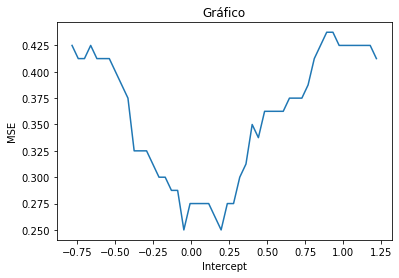

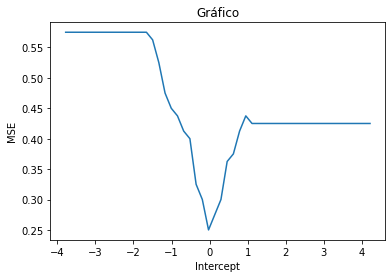

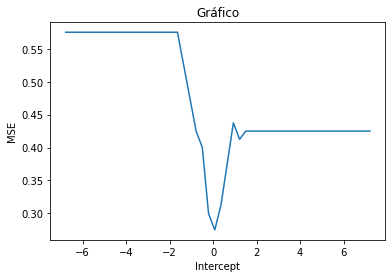

In [15]:
import numpy as np
import matplotlib.pyplot as plt

delta = 1
delta_range = 3
iteracoes = 50
graficos = 3

for i in range(graficos * modelo.intercept_.shape[0]):

    intercept_range = np.linspace(intercept_ypred - delta, intercept_ypred + delta, iteracoes)
    delta = delta + delta_range
    
    mse = []

    for i in range(iteracoes):
        modelo.intercept_ = intercept_range[i]
        ypred =  modelo.predict(X)
        mse.append(mean_squared_error(y, ypred))

    plt.title("Gráfico")
    plt.ylabel("MSE")
    plt.xlabel("Intercept")
    plt.plot(intercept_range, mse)
    plt.show()

    